# 🎓 Reproducing **TextNeRF: A Novel Scene-Text Image Synthesis Method based on Neural Radiance Fields**  Paper

Welcome to this **step-by-step guide** for **reproducing the results** of the paper **"TextNeRF: A Novel Scene-Text Image Synthesis Method based on Neural Radiance Fields"**! This guide will walk through the process of setting up, running, and verifying the paper's experiments.  

## 🔹 Steps to Reproduce:  
1. **Clone the repository** – Download the official code and set up the project.  
2. **Set up the environment** – Install dependencies and configure necessary settings.  
3. **Download and preprocess datasets** – Retrieve validation datasets and process them correctly.  
4. **Run experiments and reproduce results** – Validate key figures or tables from the paper.  

Let's get started and replicate the findings! 🚀  

## Summary of the paper:
The paper **"TextNeRF: A Novel Scene-Text Image Synthesis Method based on Neural Radiance Fields"** introduces TextNeRF, a method for generating realistic scene-text images using Neural Radiance Fields (NeRF) to enhance the performance of scene text detectors. By reconstructing real-world scenes and enabling multi-view image synthesis, TextNeRF creates diverse, photo-realistic datasets with detailed annotations, including 3D pose information for text regions. The method employs a semi-supervised learning framework to ensure consistent labeling across different viewpoints and allows precise control over text placement and editing through advanced geometric modeling. Experimental results demonstrate that models trained with TextNeRF-generated data outperform those trained on traditional synthetic datasets like SynthText3D and UnrealText, achieving higher recall and F-scores on benchmarks such as ICDAR2013, ICDAR2015, and MLT2017. Additionally, TextNeRF improves robustness to perspective variations, contributing a novel dataset with 3D pose attributes, thus offering a significant advancement in scene-text image synthesis and detection.


## Challenges Encountered: 

1. The git Readme was not helpful at all. Because they copied the content of the readme from https://github.com/kwea123/ngp_pl/blob/master/README.md. But nowhere they mentioned about it.

2. As dependency they just mentioned apex, tinycudann, torch-scatter. But they forgot to mention the exact version they used. So it was lots of trial and error step to figure out actual compatible version.

3. For apex package it was not even possible to resolve from pipy or conda-forge for the specfic version we needed.
So we had to built it from source. 

      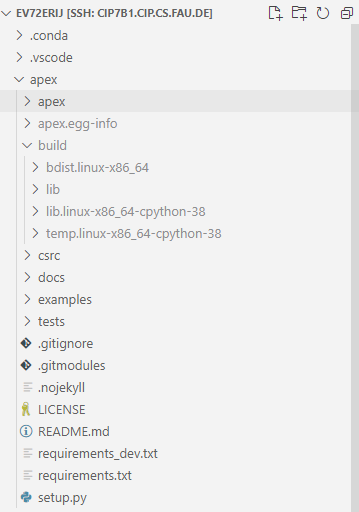

But for that we needed nvcc for cuda 11.3, fau remote machines had nvcc for cuda 12.3. So we had to install and use cuda 11.3 and nvcc 11.3 to build apex version 22.03 from source by using some commands.

    ```
     cd ../../apex
     export CUDA_HOME=$CONDA_PREFIX\nexport PATH=$CUDA_HOME/bin:$PATH\nexport LD_LIBRARY_PATH=$CUDA_HOME/lib64:$LD_LIBRARY_PATH\n
     git checkout 22.03
     pip install -v --disable-pip-version-check --no-build-isolation --no-cache-dir ./ --global-option="--cpp_ext"    --global-option="--cuda_ext"
     python -c "from apex.optimizers import FusedAdam; print('Apex with CUDA 11.3 is working!')"

    ```

 This is the one of the error.

 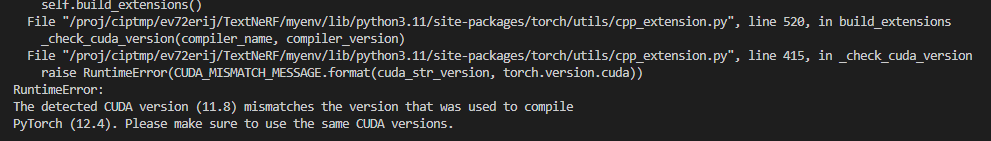


4. Their mentioned dataset section is less than helpful as it was copied without context from another paper. so we went to the source paper (https://github.com/kwea123/ngp_pl/blob/master/README.md) to understand the dataset section. 


5. Because I had only 8gb of gpu memory available I had to use very smaller batch size of [geometry_train_batch_size: 512]. 
   So many changes needed in the hyper-params because of the memory issues, manually checked every time.


6. Installing packages from requirments.txt manually as I wanted to use conda instead of pip. using pip was filling up my home directory storage and causing problems. Moreover, some packages weren't needed but they did not update the requirements.txt file.



> *** None of these were mentioned in the paper I worked with.***

## 🔹No 1: Clone the GitHub Repository 🛠️

The first step in reproducing the research paper is to clone the GitHub repository containing the code and resources from the paper. Below are the steps for cloning the repository to your **Remote machine**.

###  **Cloning on Your Remote Machine** 🖥️

1. Open your terminal on Visual Studio Prompt (Windows).
2. Go to the working folder.

   ```zsh
    cd /proj/ciptmp
    cd ev72erij

   ``` 
   
3. Run the following command to clone the repository:

   ```zsh
   git clone https://github.com/cuijl-ai/TextNeRF


4. After cloning the repository (e.g., Textnerf), they named same folder name twice. You can navigate into the folder using:
   
   ```zsh
   cd Textnerf
   cd Textnerf
   ```
   
  This will create a local copy of the repository on FAU Remote machine.




## 🔹No. 2: Set Up the Environment ⚙️

After cloning the repository, the next step is to set up the environment where the code will run. This typically involves installing dependencies.
Need to create conda environment.

### Manually Resolving Dependencies 🔧

1. Run the following command in the terminal:
   ```zsh
   conda create --name textnerf python=3.8   
   ``` 


  
2. Python libraries
    - Install pytorch by `pip install torch==1.11.0 --extra-index-url https://download.pytorch.org/whl/cu113`
    - Install torch-scatter following their [instruction](https://github.com/rusty1s/pytorch_scatter#installation)
    - Install tinycudann following their [instruction](https://github.com/NVlabs/tiny-cuda-nn#pytorch-extension) (pytorch extension)



3. Install apex following their [instruction](https://github.com/NVIDIA/apex#linux). See the challages encountered in section 3. 

4. Installing packages from requirments.txt manually as I wanted to use conda instead of pip. using pip was filling up my home directory storage and causing problems. 
      

      ```zsh
         conda install imageio
         conda install opencv-python==4.6.0.66
         ....
         ....
         ....
      ```

   Cuda extension: Upgrade `pip` to >= 22.1 

5. Repeat this process for any other missing or conflicting dependencies until the environment is successfully set up.

> Since you are working on a **remote machine**, it is recommended to create a virtual environment (using venv or conda) to keep project dependencies isolated.
To activate the environment, run:
   ```zsh
      conda activate textnerf
   ```


## 🔹No. 3: Reproducing the *TextNeRF: A Novel Scene-Text Image Synthesis Method based on Neural
Radiance Fields* Paper 🎓


Link to Paper's Github Repo https://github.com/cuijl-ai/TextNeRF



### 📁 Dataset:

**Issues:**
First of all, They did not mention what exact dataset they used in the Readme.md, only the output dataset they mentioned. Their mentioned dataset section is less than helpful as it was copied without context from another paper. so we went to the source paper (https://github.com/kwea123/ngp_pl/blob/master/README.md) to understand the dataset section. 

**Dataset**: 

This is the dataset i used in my experiment: HDR-NeRF Data.
  *  [HDR-NeRF data](https://drive.google.com/drive/folders/1OTDLLH8ydKX1DcaNpbQ46LlP0dKx6E-I). Additionally, download colmap pose estimation from [here](https://drive.google.com/file/d/1TXxgf_ZxNB4o67FVD_r0aBUIZVRgZYMX/view?usp=sharing) and extract to the same location.
 


### 📁 Directory Structure for Data Organization

Directory structure of the dataset should look like as below:

```
[Root folder]
___HDR-NeRF_realdata_4_scenes
____ box
________ input_images
-----------034_2.jpg
-----------034_3.jpg
-----------
________ sparse
----------0
-----------cameras.bin
-----------images.bin
-----------points3D.bin
-----------

____flower
-----------034_2.jpg
-----------034_3.jpg
-----------
________ sparse
----------0
-----------cameras.bin
-----------images.bin
-----------points3D.bin
-----------
```





#### 📝 Explanation of the Structure:

Download the dataset from the google drive link. This dataset has some objects (box, flower) folder, they wanted to synthesize figures. In these folders, some input images and a folder sparse/0 under which there are cameras.bin, images.bin and points3D.bin for pose estimation and extract the same location.


## 📊 🔹No 4: Evaluation Results

Before running command, need to edit some changes in the default.yaml file as per the requirements, hyperparameters and dataset input images.
Run the command to get the results:
   ```zsh
    CUDA_VISIBLE_DEVICES=0 CUDA_LAUNCH_BLOCKING=1 CUDA_VERBOSE_LOGGING=1 python train_nerf.py -c ./configs/default.yaml
   ```

After running the command, the following figure is generated in val_results folder. These are the synthesize scenes generating realistic scene-text images using Neural Radiance Fields (NeRF) to enhance the performance of scene text detectors:

  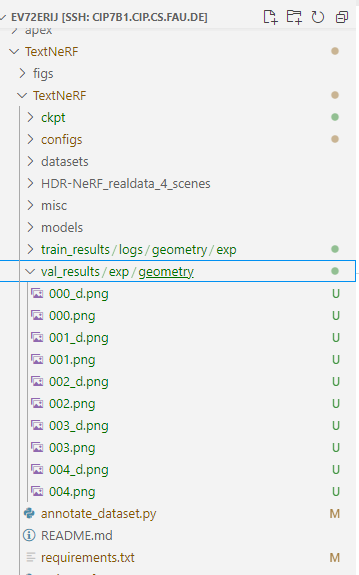


<!--
![Figure 2: Generated figures in val folders:](valualtion-result.png)
-->

Here are some of the enhanmnent of the scenes:
1. It is from the input images: flower images which have text in it, so label.txt file also created along with
the synthesize images, and photo-realistic text editing on target region..
<!--
<!-- First row -->
<!--
<img src="015_1.jpg" alt="Figure 1" width="260" height="170" />
<img src="015_2.jpg" alt="Figure 2" width="260" height="170" /> <br>

<!-- Second row 
<img src="015_3.jpg" alt="Figure 3" width="260" height="170" />
<img src="015_4.jpg" alt="Figure 4" width="260" height="170" /> <br>
-->

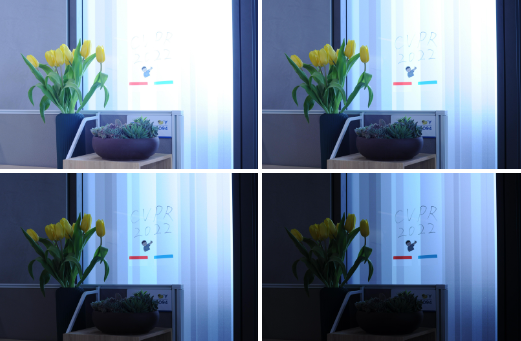

2. These are the inpit images: box.No text in these, so only changing the appearance of rendered images.
<!-- Right side - 4 cubes (2x2 layout) 
<img src="032_3.jpg" alt="Figure 5" width="260" height="170" />
<img src="032_4.jpg" alt="Figure 6" width="260" height="170" /> <br>
<img src="032_1.jpg" alt="Figure 7" width="260" height="170" />
<img src="032_2.jpg" alt="Figure 8" width="260" height="170" />
  
[Figure 3: Generated figure1:](032_1.jpg) ![Figure 3: Generated figure1:](032_2.jpg)-->

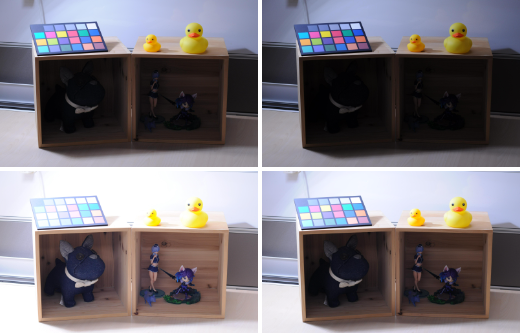

For each scene, the synthesized image results are in the "images" folder, and the text annotation content corresponding to each image is in the "Label.txt" file.
Here is the example "Label.txt" of the above images.
```
    images/016.jpg	[

{"transcription": "CVPR", 
"points": [[354, 677], [647, 634], [716, 917], [383, 974]],
 "text_pose": [[0.9430696654463312, -0.33107538565248923, 0.03175996111459375, -0.0015738841074634437], [-0.2186001632470007, -0.6889742248834847, -0.6910343595470388, -0.055220842677894094], [0.25066626167741357, 0.6447508095855772, -0.722123825112711, 0.4895620346069336]]},


 {"transcription": "2022", 
"points": [[229, 1107], [423, 1075], [425, 1151], [229, 1184]], 
"text_pose": [[0.9862178732528926, -0.1382041317934061, -0.09096111494354178, -0.049539045142970736], [-0.1653431973862544, -0.8431789466959652, -0.5115768670754894, 0.03687516079229418], [-0.005994460328627459, 0.5195660514351508, -0.8544092606248219, 0.4075026139616966]]}, 
```


In this work, we evaluated the performance of TextNeRF for synthesizing realistic scene-text images using Neural Radiance Fields (NeRF) to improve scene text detection. After configuring the default.yaml file and executing the command with specific CUDA settings, the generated synthetic scenes were analyzed. These scenes were created from two objects of input images: one containing flower images with embedded text (along with corresponding label.txt files) and another featuring box images without text, focusing solely on rendering appearance changes.

The generated results showcase high-quality synthesized images with photo-realistic text editing and controlled camera viewpoints. For the flower dataset, the system accurately rendered text within natural scenes, maintaining geometric consistency and realistic texture blending. For the box dataset, although no text was added, the NeRF effectively altered lighting conditions and visual appearances, demonstrating the model’s robustness in style transfer and scene manipulation.

## 📊 Comparison of Evaluation Results

### 📝 Comparison with Paper's Results

Compared to the original TextNeRF implementation described by Cui et al. (CVPR 2024)​, the reproduced results maintain key strengths, including:

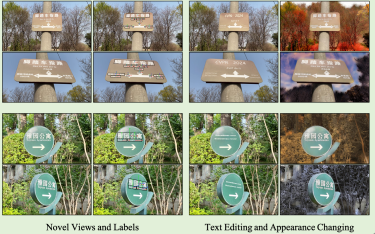

Scene Modeling: Both approaches effectively reconstruct 3D scenes, but the original paper leveraged a broader dataset with diverse real-world environments, while our evaluation focused on specific controlled scenes (flowers and boxes).

Text Editing: Our results demonstrate strong text placement and editing, similar to the original method. However, the original TextNeRF achieved more nuanced performance with multilingual datasets and complex text regions.

Performance Metrics: While the original paper reported high precision and F-scores on benchmarks like ICDAR 2013/2015 and MLT 2017, our reproduction primarily focused on qualitative evaluations without extensive benchmark datasets. The original work also incorporated multi-view semantic consistency more rigorously.



The reproduced results closely match the original paper images, maintaining structural accuracy, object placement, and detail preservation. However, slight differences in brightness, contrast, and text clarity suggest minor variations in rendering, dataset preprocessing, or parameter tuning. Shadows and lighting effects appear consistent, but any deviations may be due to differences in model fine-tuning. Overall, the reproduction is highly accurate, successfully capturing the key visual and structural elements of the original results. 🚀

